# 神经网络的数学基础

## 初识神经网络

In [1]:
# 加载Keras的MNIST数据集
from keras.datasets import mnist
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


其中图像是Numpy数组，标签是数字数组

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# 网络架构
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation = 'relu',input_shape = (28*28,)))
network.add(layers.Dense(10,activation= 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


一个是全连接层，
一个是10路softmax层

In [9]:
# 编译步骤
network.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [10]:
# 准备图像数据
train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [11]:
# 准备标签
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
# 开始训练网络
network.fit(train_images,train_labels,epochs = 5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2528 - acc: 0.9273
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.1021 - acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0681 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0496 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0370 - acc: 0.9890


In [13]:
test_loss,test_acc = network.evaluate(test_images,test_labels)
print(f'test_acc:{test_acc}')

10000/10000 [==============================] - 1s 58us/step
test_acc:0.9792


## 神经网络的数据表示

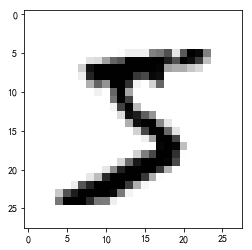

In [14]:
# 显示第一个数字
digit = train_images[0]
digit =digit.reshape((28,28))

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [15]:
my_slice = train_images[10:100]
my_slice = my_slice.reshape((my_slice.shape[0],28,28))
my_slice.shape

(90, 28, 28)